In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
customer = pd.read_csv('../dataset/customer_classification_clean_data.csv')

In [4]:
customer.head()

,age,current_balance,conn_tr,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,has_tv_package_yes,last_contact_cell,last_contact_cellular,last_contact_telephone,last_contact_unknown,outcome_previous_campaign_failure,outcome_previous_campaign_other,outcome_previous_campaign_success,outcome_previous_campaign_unknown,new_contract_this_campaign
0,39,-1.90,4,8,-1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,53,3.62,1,2,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,79,27.87,3,1,377,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,43,5.50,3,2,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,35,3.44,2,16,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [5]:
customer.shape

(50662, 41)

In [6]:
customer.dtypes

age                                            int64
current_balance                              float64
conn_tr                                        int64
this_campaign                                  int64
days_since_last_contact_previous_campaign      int64
contacted_during_previous_campaign             int64
job_admin.                                     int64
job_blue-collar                                int64
job_entrepreneur                               int64
job_housemaid                                  int64
job_management                                 int64
job_retired                                    int64
job_self-employed                              int64
job_services                                   int64
job_student                                    int64
job_technician                                 int64
job_unemployed                                 int64
job_unknown                                    int64
married_divorced                              

In [8]:
x = customer.drop(columns=['new_contract_this_campaign'])
y = customer['new_contract_this_campaign']

In [9]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=30)

In [11]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print('x_test.shape: ', x_test.shape)
print('x_test.shape: ', x_test.shape)


x_train.shape:  (30396, 40)
y_train.shape:  (30396,)
x_val.shape:  (10133, 40)
y_val.shape:  (10133,)
x_test.shape:  (10133, 40)
x_test.shape:  (10133, 40)


In [12]:
rfc_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
rfc_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
rfc_model.score(x_train, y_train)

0.9998026056060008

In [15]:
rfc_model.score(x_val, y_val)

0.8671666831145761

In [16]:
rfc_proba = rfc_model.predict_proba(x_train)
rfc_proba

array([[1.  , 0.  ],
       [0.93, 0.07],
       [0.96, 0.04],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [0.97, 0.03]])

In [17]:
rfc_model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

plt.figure(figsize=(80, 20))
plot_tree(rfc_model.estimators_[0], 
          max_depth=2, 
          feature_names=x_train.columns, 
          filled=True, 
          rounded=True, 
          class_names = rfc_model.classes_
          )

In [18]:
len(rfc_model.estimators_)

100

In [19]:
importance_df = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : rfc_model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
1,current_balance,0.241834
0,age,0.201511
3,this_campaign,0.077468
2,conn_tr,0.074206
4,days_since_last_contact_previous_campaign,0.056537
38,outcome_previous_campaign_success,0.054260
5,contacted_during_previous_campaign,0.030500
28,housing_yes,0.015447
27,housing_no,0.014494
33,last_contact_cellular,0.013030


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

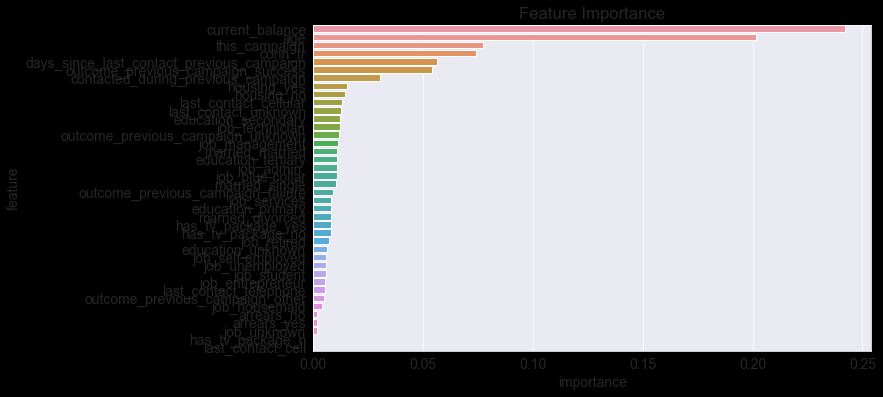

In [20]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams['figure.facecolor'] = '#000000'

plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature')

In [21]:
def error_rate(est):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=est)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'No. of Estimators' : est, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [22]:
rfc_error_df = pd.DataFrame([error_rate(est) for est in range (1, 30)])

In [23]:
rfc_error_df

,No. of Estimators,Training Error,Validation Error
0,1,0.077247,0.213362
1,2,0.070075,0.171617
2,3,0.033985,0.176256
3,4,0.039841,0.162440
4,5,0.020299,0.160268
5,6,0.026155,0.153459
6,7,0.014706,0.152176
7,8,0.018522,0.147340
8,9,0.010561,0.147735
9,10,0.013719,0.145465


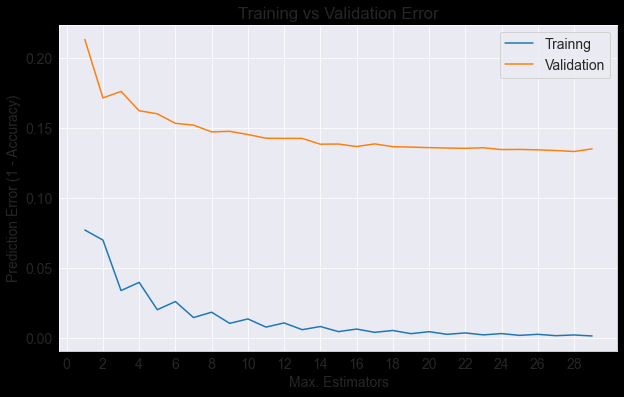

In [24]:
plt.figure()
plt.plot(rfc_error_df['No. of Estimators'], rfc_error_df['Training Error'])
plt.plot(rfc_error_df['No. of Estimators'], rfc_error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,30,2))
plt.xlabel('Max. Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Trainng', 'Validation'])

In [25]:
def md_error_rate(dm):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=dm)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'Max Depth' : dm, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [26]:
md_df = pd.DataFrame([md_error_rate(dm) for dm in range (1, 26)])

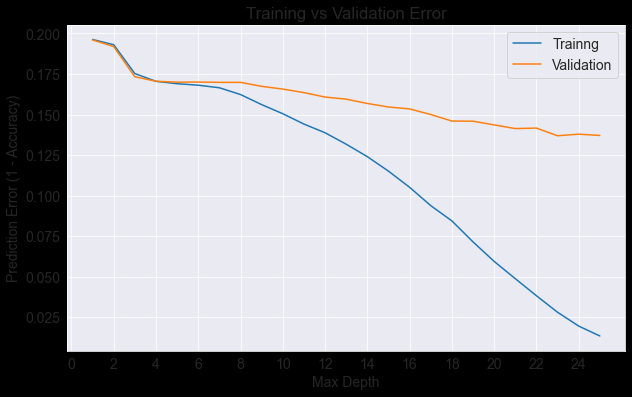

In [27]:
plt.figure()
plt.plot(md_df['Max Depth'], md_df['Training Error'])
plt.plot(md_df['Max Depth'], md_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,26,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Trainng', 'Validation'])

In [28]:
def mln_error_rate(mln):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_leaf_nodes=mln)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'Max Leaf_nodes' : mln, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [29]:
mln_df = pd.DataFrame([mln_error_rate(mln) for mln in range(2, 32)])

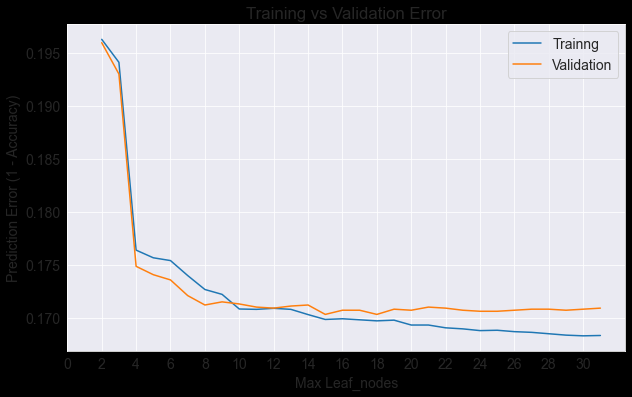

In [30]:
plt.figure()
plt.plot(mln_df['Max Leaf_nodes'], mln_df['Training Error'])
plt.plot(mln_df['Max Leaf_nodes'], mln_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,32,2))
plt.xlabel('Max Leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Trainng', 'Validation'])

In [31]:
def mf_error_rate(mf):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=mf)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'Max Features' : mf, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [32]:
mf_df = pd.DataFrame([mf_error_rate('log2')])
mf_df

,Max Features,Training Error,Validation Error
0,log2,0.000197,0.134412


In [33]:
mf_df = pd.DataFrame([mf_error_rate('sqrt')])
mf_df

,Max Features,Training Error,Validation Error
0,sqrt,0.000197,0.132833


In [34]:
mf_df = pd.DataFrame([mf_error_rate('auto')])
mf_df

,Max Features,Training Error,Validation Error
0,auto,0.000197,0.132833


In [35]:
def arg_parameters(**params):
    rf_test = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    
    return rf_test.score(x_train, y_train), rf_test.score(x_val, y_val)

In [36]:
arg_parameters(min_impurity_decrease=1e-7)

(0.9984537439136728, 0.8658837461758611)

In [37]:
arg_parameters(min_impurity_decrease=1e-5)


(0.8805763916304777, 0.8432843185631106)

In [38]:
arg_parameters(bootstrap=False)


(0.9998026056060008, 0.8764433040560545)

In [39]:
arg_parameters(bootstrap=True, max_samples=0.9)


(0.9994407158836689, 0.8648968716076186)

In [40]:
rf_tuned = RandomForestClassifier(
    random_state=42,
    n_estimators=4,
    max_features='sqrt',
    max_leaf_nodes=4,
    max_depth=4,
    min_impurity_decrease=1e-5,
    bootstrap=True,
    max_samples=0.9,
)

In [41]:
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=4,
                       max_samples=0.9, min_impurity_decrease=1e-05,
                       n_estimators=4, random_state=42)

In [42]:
rf_tuned.score(x_train, y_train), rf_tuned.score(x_val, y_val)

(0.8209632846427162, 0.8236455146550873)

In [43]:
rf_tuned.score(x_test, y_test)

0.8261127010756932

In [44]:
predictions_1 = rf_tuned.predict(x_test)

In [45]:
probability = rf_tuned.predict_proba(x_train)
probability

array([[0.82383937, 0.17616063],
       [0.82383937, 0.17616063],
       [0.8530688 , 0.1469312 ],
       ...,
       [0.88254974, 0.11745026],
       [0.79872398, 0.20127602],
       [0.88254974, 0.11745026]])

In [46]:
probability = rf_tuned.predict_proba(x_test)
probability

array([[0.74453199, 0.25546801],
       [0.83235629, 0.16764371],
       [0.88254974, 0.11745026],
       ...,
       [0.77280966, 0.22719034],
       [0.80203909, 0.19796091],
       [0.74289048, 0.25710952]])

In [47]:


accuracy = accuracy_score(y_test, predictions_1)
print('Accuracy = {:.3f}%' .format(accuracy*100))

Accuracy = 82.611%


In [48]:
confusion = confusion_matrix(y_test, predictions_1)
score = confusion.diagonal() / confusion.sum(axis =1) *100
print('Customer likley to respond: {:.2f}%' .format(score[0]))
print('Customer not likely to respond:  {:.2f}%' .format(score[1]))

Customer likley to respond: 99.32%
Customer not likely to respond:  12.33%


<AxesSubplot:>

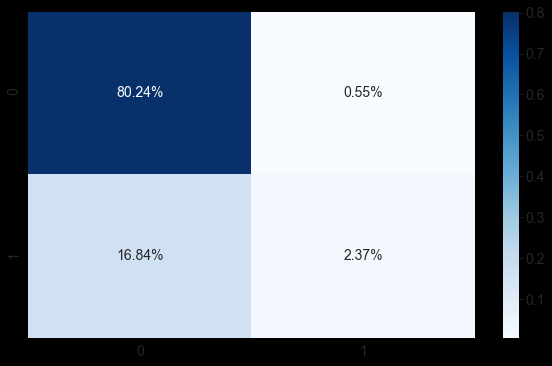

In [49]:
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

In [50]:
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      8187
           1       0.81      0.12      0.21      1946

    accuracy                           0.83     10133
   macro avg       0.82      0.56      0.56     10133
weighted avg       0.82      0.83      0.77     10133

